<a href="https://colab.research.google.com/github/timomwa/50ForReel/blob/master/ITEC610_Python_Codes_And_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Answers for;***

---


### ***UTEC610 Python Fundamentals for data science, Semester 1, 2022 Assignment number (2)***

### Assessment Artefact: Python Codes and Comments 
Weighing [30%]

# **Question 2** 
*Download csv data with pandas with below code*

```  
import pandas as pd

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

```





In [416]:
import pandas as pd

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# **Question 3**
*Display first 5 rows of the loaded data*

In [417]:
# Question 3
#           Display first 5 rows
#           of the loaded data
deaths_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22
0,NaN,Afghanistan,34,68,0,0,0,0,0,0,...,7683,7683,7683,7683,7683,7684,7684,7684,7684,7685
1,NaN,Albania,41,20,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3497,3497
2,NaN,Algeria,28,2,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,43,2,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11,18,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


...and do a short summary about the data;

*   The resultant table comes from the CSV served by the URI.
*   The data set consists of a list of geographical 
locations with GPS coordinates of each.
The data has a spread of 839 days starting 22nd Jan 2020 to 9th May 2022 - about a period of 2 years 4 months.


# **Question 4**
*Get daily cases worldwide ( hint: summarising daily death cases over all countries*

In [418]:
# Yank out 3 unecessary columns
# i.e 'Lat','Long','Province/State'
# Leaving 'Country/Region' & deaths per day
# Columns
death_cases_worldwide = deaths_df.drop(['Lat','Long','Province/State'], axis=1);
death_cases_worldwide

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7683,7683,7683,7683,7683,7684,7684,7684,7684,7685
1,Albania,0,0,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3497,3497
2,Algeria,0,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,Andorra,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5657,5657,5657,5657,5657,5657,5657,5657,5657,5657
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,Yemen,0,0,0,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
282,Zambia,0,0,0,0,0,0,0,0,0,...,3976,3976,3976,3976,3976,3976,3976,3982,3982,3982


# **Question 5**
*Get daily increasement of death cases via defining a function (hint: use the death cases of today minus the death cases of yesterday from the data obtained in task 4).*



In [489]:
death_cases_worldwide_ = death_cases_worldwide.head(5)

def calc_increment(x):
  current_col_idx = death_cases_worldwide_.columns.get_loc(x.name)
  if current_col_idx > 1:
    prev_column_idx = current_col_idx - 1;
    prev_column = death_cases_worldwide_.iloc[:, (current_col_idx-1):]
    death_cases_of_today = x.iloc[0]
    death_cases_of_yesterday = prev_column.iloc[0].iloc[0]
    increment = int(death_cases_of_today) - int(death_cases_of_yesterday)
    x.iloc[0] = increment
   
death_cases_worldwide_.apply( calc_increment, axis=0 )
# print(death_cases_worldwide_)


  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...       4/30/22        5/1/22        5/2/22  \
0        0        0        0  ...  625881201631 -629586695451  633309357911   
1        0        0        0  ...          3496          3496          3496   
2        0        0        0  ...          6875          6875          6875   
3        0        0        0  ...           153           153           153   
4        0        0        0  ...          1900          1900          1900   

         5/3/22        5/4/22        5/5/22        5/6/22        5/7/22  \
0 -63

# **Question 6**
*Visualize the data obtained in task 4 with library matplotlib*



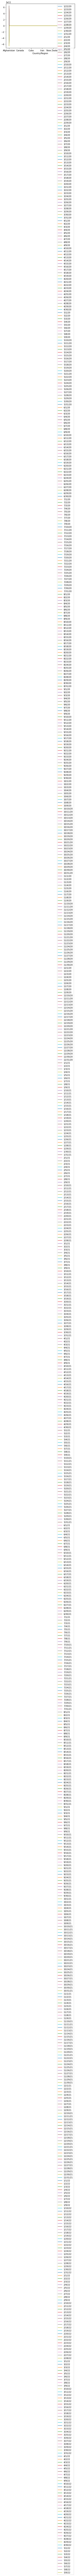

In [493]:
# Import library
import matplotlib.pyplot as plt
# Import numpy
import numpy as np

#Specify X axis to be that of Country/Region
death_cases_worldwide.plot(x='Country/Region')
#Finally Show the graph
plt.show()
